In [391]:
%matplotlib inline

import csv
import pandas as pd
from operator import itemgetter
import pylab
import datetime
import numpy
import matplotlib.image
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from operator import itemgetter
import numpy as np
from numpy import *

In [392]:
tashu = pd.read_csv('./tashu.csv')
station = pd.read_csv('./station.csv')

In [393]:
kiosk_per_district_count = station.groupby('구별').키오스크번호.count()
#kiosk_per_district_count.sort_values(inplace=True, ascending=False)
print(kiosk_per_district_count)

구별
대덕구    23
동구     17
서구     46
유성구    35
중구     23
Name: 키오스크번호, dtype: int64


In [394]:
#[f.name for f in matplotlib.font_manager.fontManager.ttflist]

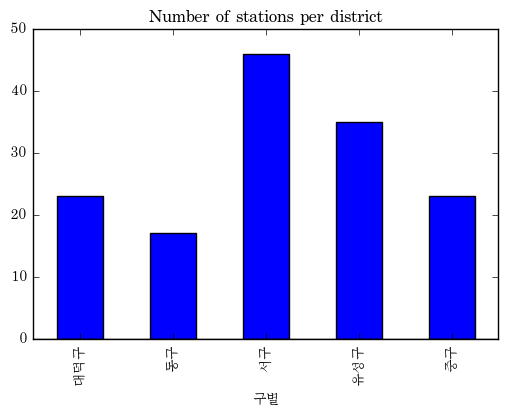

In [395]:
plt.title('Number of stations per district')
kiosk_per_district_count.plot(kind='bar');
plt.axhline(0, color='k')
plt.rc('font', family='AppleMyungjo')
plt.show()

In [396]:
kiosk_district_dict = dict(zip(station.키오스크번호, station.구별))
#kiosk_district_dict

In [400]:
import warnings

# Remove a line with error data 
warnings.filterwarnings('ignore')
whereAreNaNs = isnan(tashu.RENT_STATION)
tashu.RENT_STATION[whereAreNaNs] = 0
tashu.RETURN_STATION[whereAreNaNs] = 0
whereAreNaNs = isnan(tashu.RETURN_STATION)
tashu.RETURN_STATION[whereAreNaNs] = 0
tashu.RENT_STATION[whereAreNaNs] = 0
tashu['RENT_STATION'] = tashu['RENT_STATION'].astype('int')
tashu['RETURN_STATION'] = tashu['RETURN_STATION'].astype('int')
#tashu[:10]

In [401]:
usage_per_district = {}
for usage in tashu['RENT_STATION']:
    if usage in kiosk_district_dict:
        if kiosk_district_dict[usage] in usage_per_district:
            usage_per_district[kiosk_district_dict[usage]] += 1
        else :
            usage_per_district[kiosk_district_dict[usage]] = 1

            
usage_per_district

{'대덕구': 188524, '동구': 122669, '서구': 1590360, '유성구': 1141250, '중구': 256616}

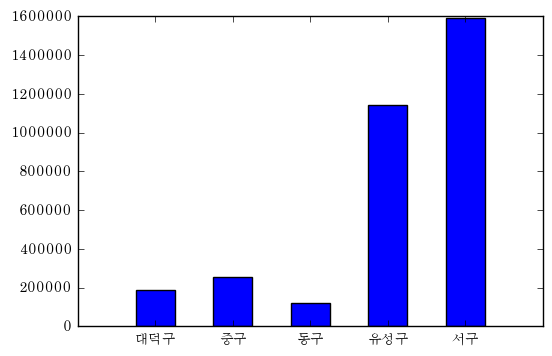

In [402]:
X = np.arange(len(usage_per_district))
plt.bar(X, usage_per_district.values(), align='center', width=0.5)
plt.xticks(X, usage_per_district.keys())
plt.rc('font', family='AppleMyungjo')
plt.show()

In [403]:
tashu['weekday'] = pd.DatetimeIndex(tashu['RENT_DATE']).weekday
tashu[:10]
rent_weekday = tashu.groupby('weekday').RENT_STATION.count()
rent_weekday

weekday
3    3404663
Name: RENT_STATION, dtype: int64